In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
# Set the base path
path = r'C:\Users\ANDREAS PPALIS\Desktop\ANDREAS\Github'
# Build full file path with the correct folder name
full_path = os.path.join(path, "Netflix", "netflix_content.csv")

# Read the CSV file
df = pd.read_csv(full_path)

In [3]:
# Return first 5 rows of dataset
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


### Cleaning and preprocessing of the "Hours viewed" column

In [4]:
# Converting "Hours viewed" column to a numeric format
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)
df[['Title','Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


### Analysis for content type to determine whether shows or movies dominate viewership

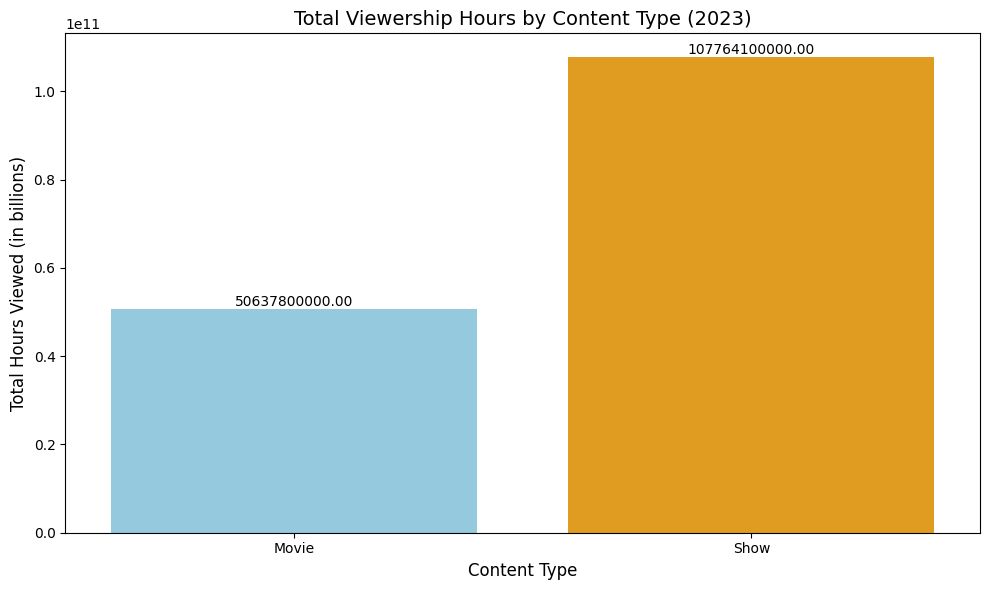

In [5]:
# Aggregate the data and reset index for plotting
content_type_viewership = df.groupby('Content Type')['Hours Viewed'].sum().sort_values().reset_index()

# Create the figure and assign the Axes object to 'ax'
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Content Type',
    y='Hours Viewed',
    hue='Content Type',
    data=content_type_viewership,
    palette=['skyblue', 'orange'],
    legend=False
)

# Add data labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add titles and axis labels
plt.title('Total Viewership Hours by Content Type (2023)', fontsize=14)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In 2023, people spent more time watching shows than movies on Netflix. That means Netflix probably focuses more on creating shows because they keep viewers watching longer.

### Analysis of distribution of viewership across different languages to understand which languages are contributing the most to Netflix's content consumption

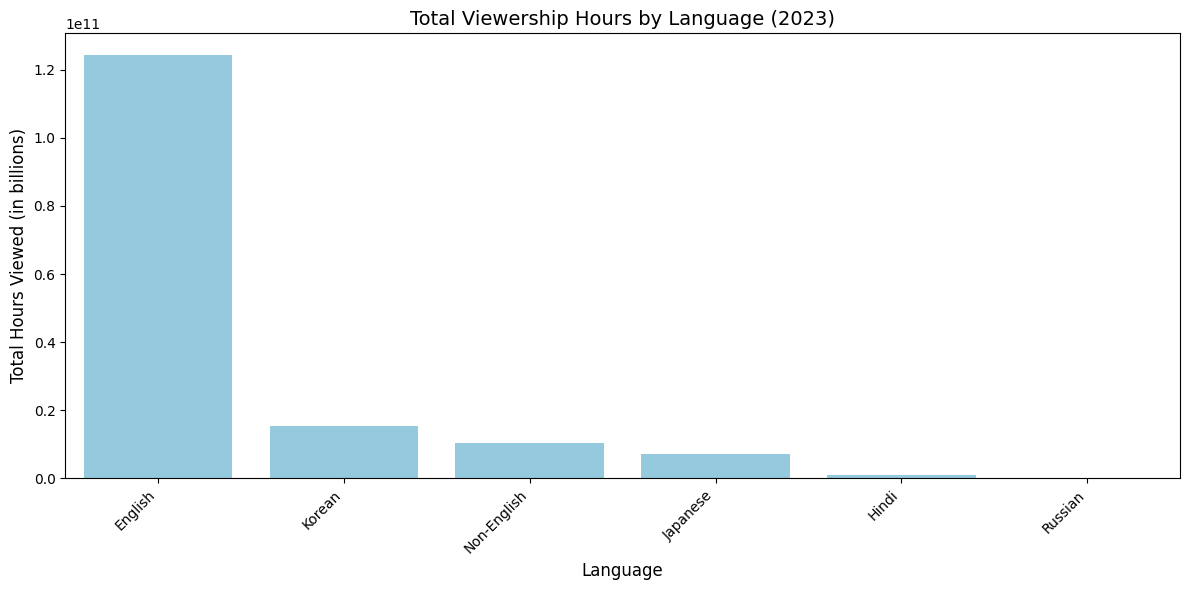

In [6]:
# Aggregate viewership hours by language
language_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False).reset_index()

# Set up the figure
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Language Indicator',
    y='Hours Viewed',
    hue = 'Language Indicator',
    data = language_viewership,
    palette=['skyblue'] * len(language_viewership),
    legend=False
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Total Viewership Hours by Language (2023)', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)

plt.tight_layout()
plt.show()

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

#### Analysis on how viewership varies based on release dates to identify any trends over time

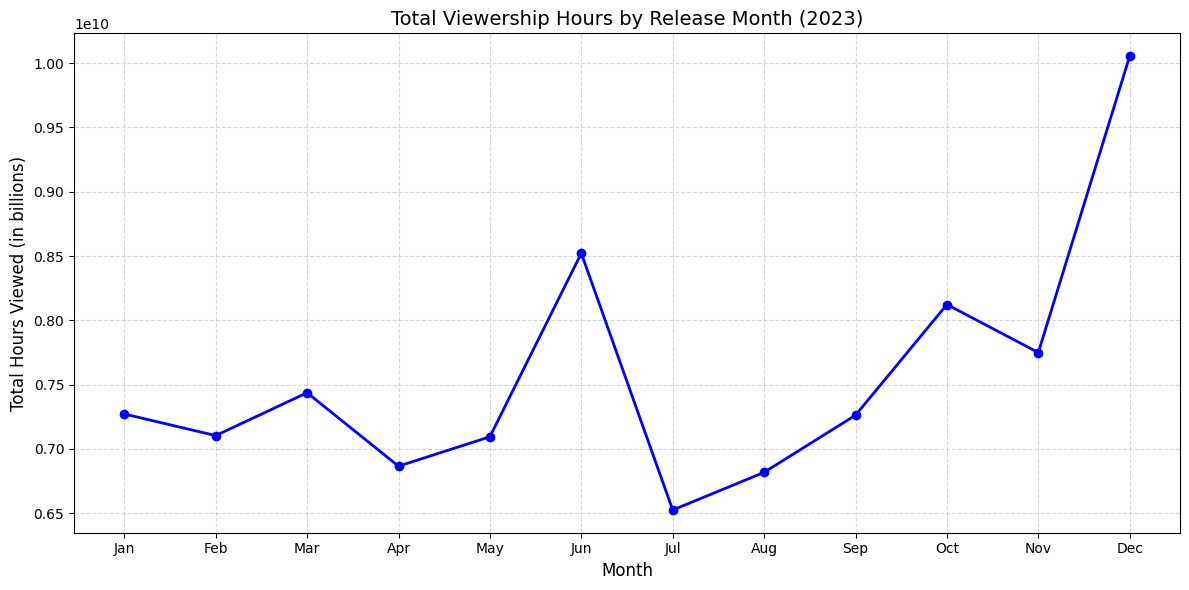

In [7]:
# Ensure date format and extract release month
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Month'] = df['Release Date'].dt.month

# Group by release month
monthly_viewership = df.groupby('Release Month')['Hours Viewed'].sum().sort_index()

# Month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_viewership.index, monthly_viewership.values, marker='o', color='blue', linewidth=2)

# Customize layout
plt.title('Total Viewership Hours by Release Month (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_labels)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. 
It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, 
while the middle months have a steady but lower viewership pattern.

We can analyze the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, 
that may have contributed to high viewership.

In [8]:
# extract the top 5 titles based on viewership hours
top_5_titles = df.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


### Viewership trend by content type

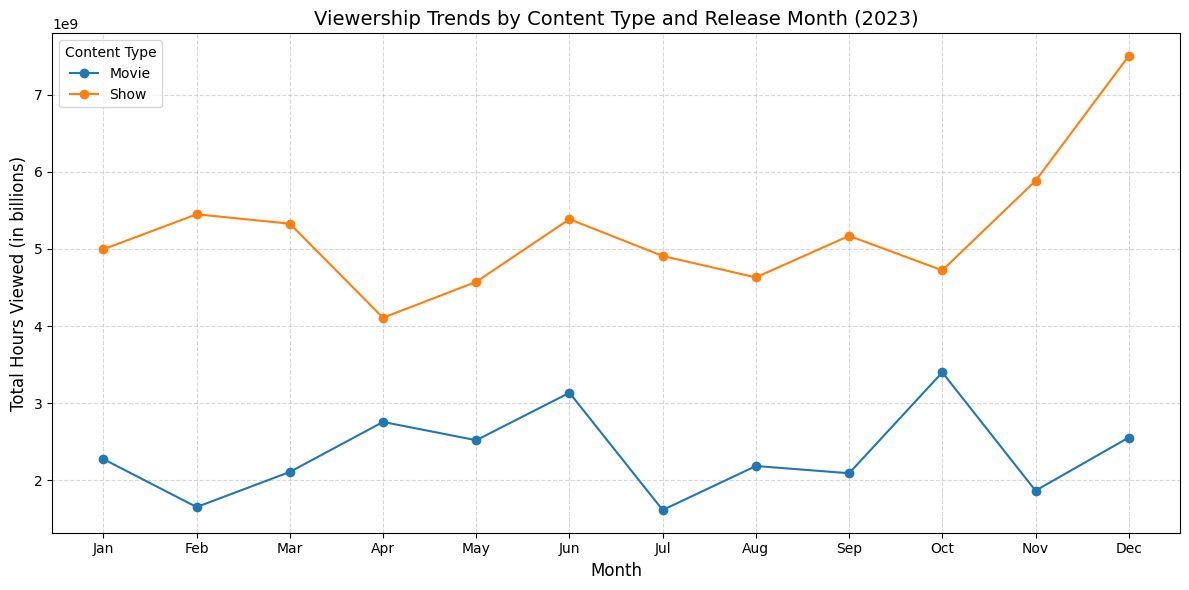

In [9]:
# Pivot table for monthly viewership by content type
monthly_viewership_by_type = df.pivot_table(index='Release Month',
                                            columns='Content Type',
                                            values='Hours Viewed',
                                            aggfunc='sum').sort_index()

# Month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the figure
plt.figure(figsize=(12, 6))

# Loop through each content type and plot its line
for content_type in monthly_viewership_by_type.columns:
    plt.plot(
        monthly_viewership_by_type.index,
        monthly_viewership_by_type[content_type],
        marker='o',
        label=content_type
    )

# Add chart details
plt.title('Viewership Trends by Content Type and Release Month (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_labels, rotation=0)
plt.legend(title='Content Type')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


The graph compares viewership trends between movies and shows throughout 2023. It indicates that shows consistently have higher viewership than movies, peaking in December. 
Movies have more fluctuating viewership, with notable increases in June and October. This shows that Netflix’s audience engages more with shows across the year, 
while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

### Analysis of total viewership hours across different release seasons

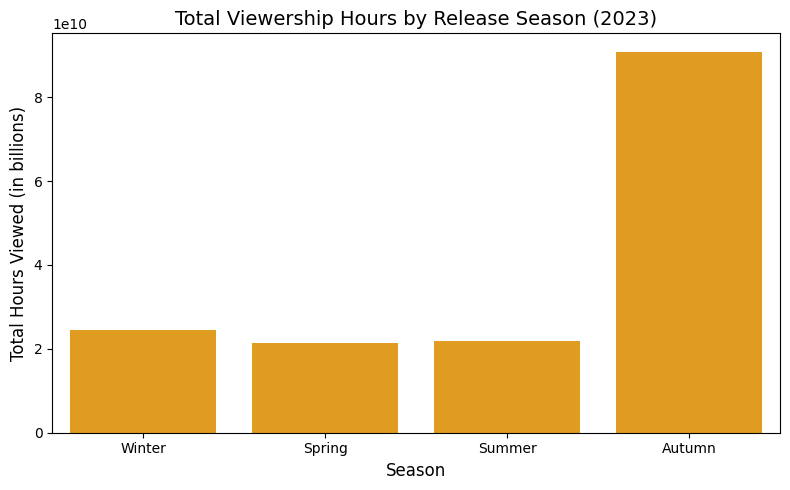

In [10]:
# Define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Getting the season labels
df['Release Season'] = df['Release Month'].apply(get_season)

# Aggregate viewership by season
seasonal_viewership = df.groupby('Release Season')['Hours Viewed'].sum().reset_index()

# Order the seasons
seasons_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_viewership['Release Season'] = pd.Categorical(seasonal_viewership['Release Season'], categories=seasons_order, ordered=True)
seasonal_viewership = seasonal_viewership.sort_values('Release Season')

# Plot with Seaborn and Matplotlib
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Release Season',
    y='Hours Viewed',
    hue='Release Season',  # fixes the hue warning
    data=seasonal_viewership,
    palette=['orange'] * len(seasonal_viewership),
    legend=False
)

# Add labels and titles
plt.title('Total Viewership Hours by Release Season (2023)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


The graph indicates that viewership hours peak significantly in the Autumn season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have 
relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Autumn.

### Number of content releases and their viewership hours across months

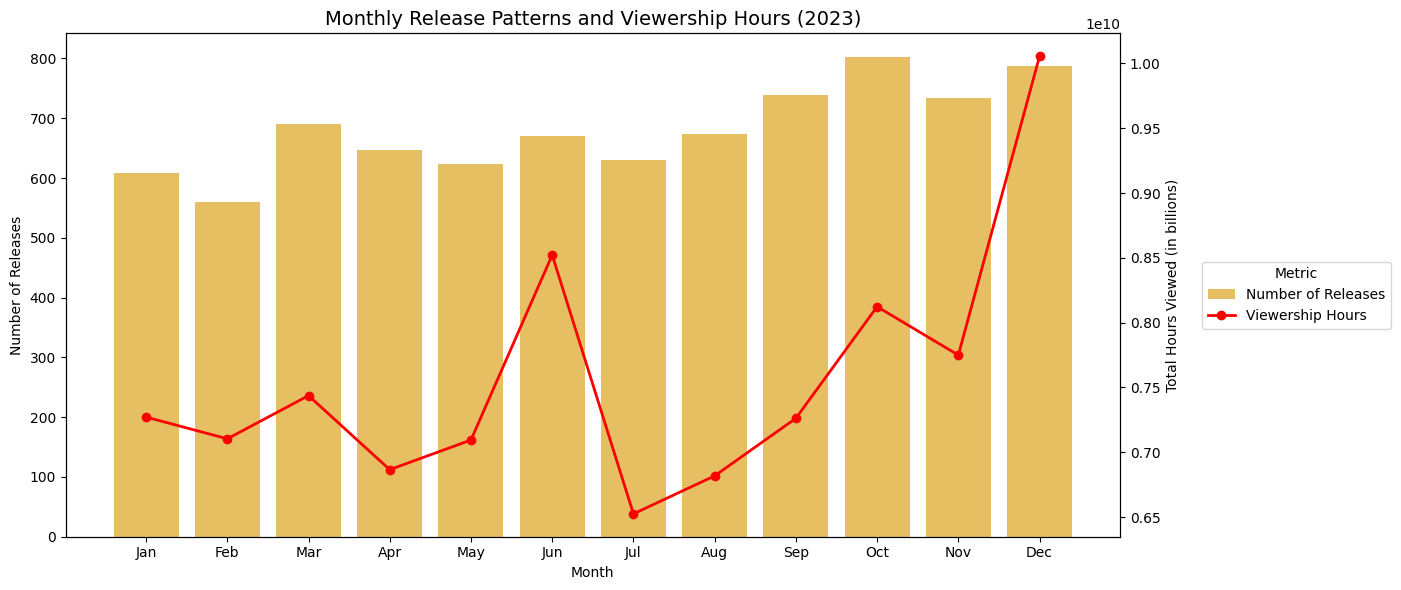

In [11]:
# Prepare data
monthly_releases = df['Release Month'].value_counts().sort_index()
monthly_viewership = df.groupby('Release Month')['Hours Viewed'].sum().sort_index()

# Month labels for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Initialize the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart: Number of releases
ax1.bar(monthly_releases.index, monthly_releases.values,
        color='goldenrod', alpha=0.7, label='Number of Releases')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Releases', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_labels)

# Create secondary axis: Viewership hours
ax2 = ax1.twinx()
ax2.plot(monthly_viewership.index, monthly_viewership.values,
         color='red', marker='o', linewidth=2, label='Viewership Hours')
ax2.set_ylabel('Total Hours Viewed (in billions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add chart title
plt.title('Monthly Release Patterns and Viewership Hours (2023)', fontsize=14)

# Optional: Add combined legend
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Metric')

plt.tight_layout()
plt.show()


While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

### Releasing content on specific weekdays and how this influences viewership patterns

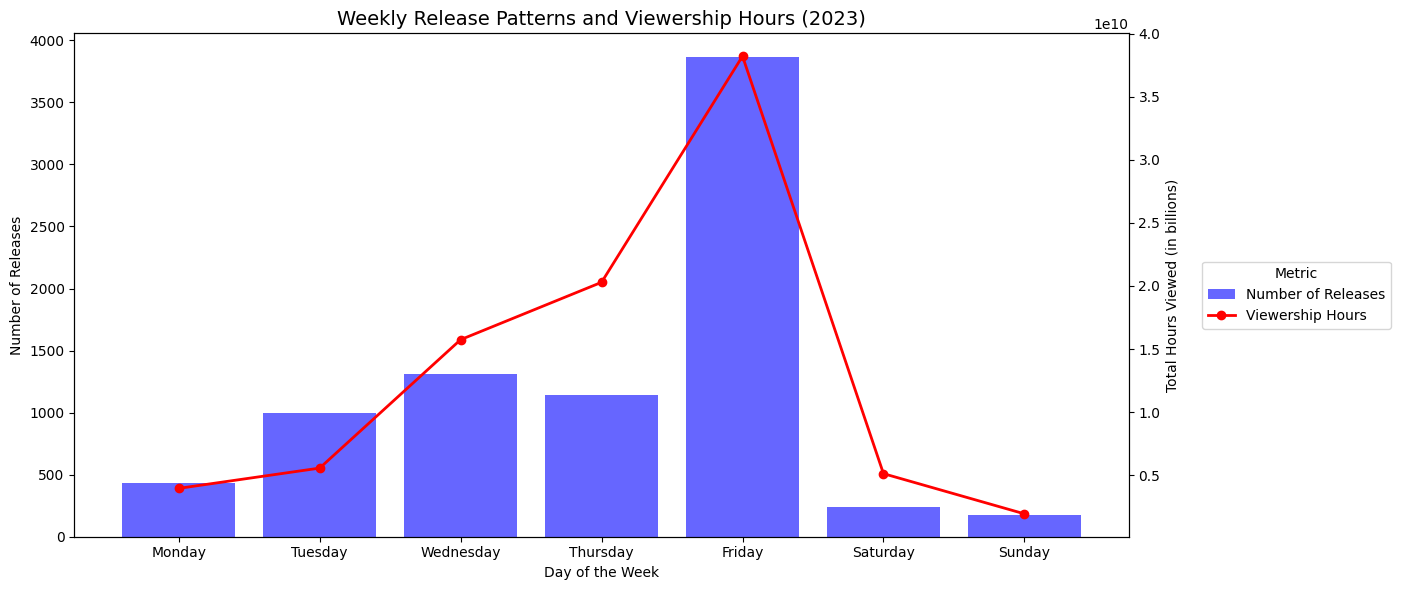

In [12]:
# Convert to datetime if not already
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Create the 'Release Day' column
df['Release Day'] = df['Release Date'].dt.day_name()

# Prepare the data
weekday_releases = df['Release Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_viewership = df.groupby('Release Day')['Hours Viewed'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart for number of releases
ax1.bar(weekday_releases.index, weekday_releases.values,
        color='blue', alpha=0.6, label='Number of Releases')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Releases', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(weekday_releases.index)))
ax1.set_xticklabels(weekday_releases.index)

# Create secondary axis for viewership
ax2 = ax1.twinx()
ax2.plot(weekday_viewership.index, weekday_viewership.values,
         color='red', marker='o', linewidth=2, label='Viewership Hours')
ax2.set_ylabel('Total Hours Viewed (in billions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and combined legend
plt.title('Weekly Release Patterns and Viewership Hours (2023)', fontsize=14)
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Metric')

plt.tight_layout()
plt.show()


The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases

In [13]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = df[df['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

- New Year’s Period: 'The Glory: Season 1', 'La Reina del Sur: Season 3', and 'Kaleidoscope: Limited Series' were released close to New Year’s Day, resulting in high viewership.
- Valentine’s Day: 'Perfect Match: Season 1' and 'The Romantics: Limited Series' were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.

### Conclusion - Netflix’s Content Strategy Overview

Netflix plans its content releases to get the most views by choosing smart timing and offering a wide variety of shows and movies.

- <u>TV Shows vs. Movies</u>: TV shows consistently get more watch time than movies.

- <u>Key Months</u>: Viewership spikes in December and June, likely because people have more free time during holidays and summer.

- <u>Seasonal Trends</u>: Autumn is the busiest season for viewers, suggesting Netflix releases popular content during this time.

- <u>Day of Release</u>: Most content comes out on Fridays, probably to catch people right as the weekend starts. The viewing data shows this strategy works well.

- <u>Release Volume vs. Impact</u>: Netflix releases a similar number of titles each month, but viewership changes. This shows they focus more on releasing strong content at the right time than just releasing a lot.